In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=False)

In [44]:
mi_range = [2**(x) for x in range(-10, 0)]

labels = [-np.log2(x) for x in mi_range]
# print(labels)

c_range = [1/(2*mi) for mi in mi_range]

In [45]:
# c_range.reverse()
c_range

[512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0]

In [46]:
len(c_range)

10

In [47]:
labels

[10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

In [48]:
def get_all_mses(dataset, e0, C_range):
    C_range = sorted(C_range)
    C_len = len(C_range)
    ind = 0
    mses = {}
    while ind < C_len:
        budgets = f'[{int(C_range[ind])}, {int(C_range[ind+1])}]'
        tmp = pickle.load(open(f'data/{dataset}_{e0}_{budgets}_mses.pkl', 'rb'))
        mses.update(tmp)
        ind += 2
    formatted_accs = {}
    for C in C_range:
        priv_obl_data = mses[(C, False)]
        priv_obl_mean_acc = np.mean([priv_obl_data[k][1] for k in range(len(priv_obl_data))])
        priv_aware_data = mses[(C, True)]
        priv_aware_mean_acc = np.mean([priv_aware_data[k][1] for k in range(len(priv_aware_data))])
        formatted_accs[C] = (priv_obl_mean_acc, priv_aware_mean_acc)
    return formatted_accs


In [49]:
d=get_all_mses('bank', 'exact', c_range)

In [50]:
d

{1.0: (0.669586421251297, 0.7087858015298844),
 2.0: (0.646521067917347, 0.7140318477153778),
 4.0: (0.6163618272542953, 0.7196837323904037),
 8.0: (0.6076943483948708, 0.7226362943649292),
 16.0: (0.5879144069552421, 0.7256662625074387),
 32.0: (0.5477308425307273, 0.7259349775314331),
 64.0: (0.5642010387778282, 0.7173460149765014),
 128.0: (0.5646079865097999, 0.7089361914992333),
 256.0: (0.5331958416104317, 0.7055479362607002),
 512.0: (0.533400419652462, 0.677325000166893)}

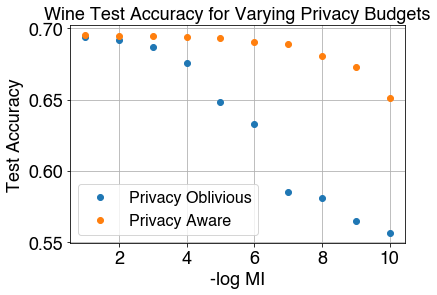

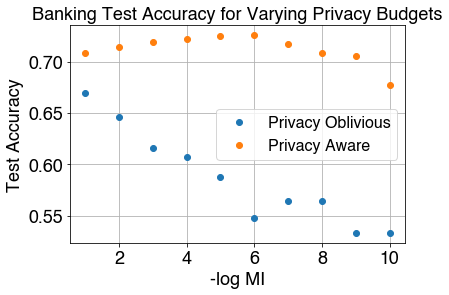

In [53]:
e0 = 'exact'
for name_ind, data in enumerate(['wine_quality', 'bank']):
    names = ['Wine', 'Banking']
    mi_range = [2**(x) for x in range(-10, 0)]

    labels = [-np.log2(x) for x in mi_range]

    c_range = [1/(2*mi) for mi in mi_range]
    accs = get_all_mses(data, e0, c_range)
    priv_obl = [accs[key][0] for key in c_range]
    priv_aware = [accs[key][1] for key in c_range]
#     print(priv_obl)
    plt.plot(labels, priv_obl, 'o', label=f'Privacy Oblivious')
    plt.plot(labels, priv_aware, 'o', label='Privacy Aware')
    plt.grid(True)
    plt.tick_params(axis='both', labelsize=18)
    plt.xlabel("-log MI", fontsize=18)
    plt.ylabel("Test Accuracy", fontsize=18)
    plt.legend(fontsize=16)
    plt.title(f"{names[name_ind]} Test Accuracy for Varying Privacy Budgets", fontsize=18)
    plt.show()

In [61]:
labels

[10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

In [62]:
2**8

256

In [131]:
d1 = pickle.load(open('data/C=0.25_census_lams.pkl', 'rb'))

In [132]:
d

{0: [11.626716736249357,
  6999.626021606106,
  5.587464306681777,
  12.87023722505132,
  29.873730739757562,
  11.536361083615478,
  831.0115939780933,
  7617.175156412599,
  132.7509796676647,
  33.59158729409444,
  991.152669196938,
  2282.3576421050516,
  5712.379929465226,
  99.04946603921454,
  84.39259659462373,
  387.9044555885089,
  505.52165419726214,
  282.7661594639618,
  187.6290054379038,
  198.44215960471894,
  164565.7398234669,
  5034.19767553315,
  18.161892503555265,
  35.897609069290326,
  36.15674651520621,
  20.97773972759604,
  1691.145561462976,
  26.71647834512935,
  152.05259800142463,
  1613748.7202223742,
  3.166115460425274,
  337.36148896316945,
  6.1905390951502755,
  101.73844489526836,
  149.49496449705762,
  5712.379929465132,
  9099.09034184094,
  13.655218746927735,
  222.6738960707855,
  81.56299282465696,
  124.68024399162825,
  26.580330199159153,
  485.0116131444097,
  18.351270265357197,
  1262.6303748015393,
  1539.3316946449418,
  1699.2360794

In [130]:
d2 = pickle.load(open('data/C=0.5_census_lams.pkl', 'rb'))

In [134]:
np.array(d2[0]) - np.array(d1[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
aware = [0.5371692296862602, 0.5547769239544869, 0.5693230774998664, 0.5805076903104782, 0.6278307721018791, 0.645323077738285, 0.6714076909422875, 0.6850615370273591, 0.6904769223928452, 0.693492306470871]
obl = [0.6399692258238793, 0.6742615392804145, 0.6835307687520981, 0.690846153497696, 0.6917923057079315, 0.6921461528539657, 0.6938307678699493, 0.693553842306137, 0.6945307689905167, 0.6951692306995392]
[0.5371692296862602, 0.5693230774998664, 0.5805076903104782, 0.6278307721018791, 0.645323077738285, 0.6714076909422875, 0.6850615370273591, 0.6904769223928452, 0.693492306470871]
[0.6399692258238793, 0.6835307687520981, 0.690846153497696, 0.6917923057079315, 0.6921461528539657, 0.6938307678699493, 0.693553842306137, 0.6945307689905167, 0.6951692306995392]